### MNIST

* Images of handwritten digits
  * Collated into ML dataset by Yann Lecun
 
* Example of starting with something really simple and scaling up.

In [4]:
from fastai.vision.all import *

* `untar_data` is an downloads and uncompresses data idempotently. 

In [5]:
path = untar_data(URLs.MNIST_SAMPLE)

* fastai adds an `ls` method to `Path` which returns a fastai class called `L`.
    * `L` has all the function features of lists + more.

In [6]:
path.ls?

Signature: path.ls(n_max=None, file_type=None, file_exts=None)
Docstring: Contents of path as a list
File:      /opt/conda/lib/python3.7/site-packages/fastcore/xtras.py
Type:      method


In [7]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [8]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [9]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

* Example of one of the images labelled 3:

In [10]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [11]:
type(im3)

PIL.PngImagePlugin.PngImageFile

## 01:11:37 PIL and Images

* Python library PIL is one of the most widely used image library.
* In a computer, everything is represented as a number. To view numbers in image in Juypter, we have to convert to NumPy array using the `array` function.

In [12]:
array

<function numpy.array>

* Taking the first 15 rows and the first 10 columns to make visualisation easier.

In [13]:
array(im3)[0:15, 0:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224],
       [  0,   0,   0,   0,   0,  93, 244, 249, 253, 187],
       [  0,   0,   0,   0,   0, 107, 253, 253, 230,  48],
       [  0,   0,   0,   0,   0,   3,  20,  20,  15,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  16],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

* The numbers are 8-bit unsigned [[Integers]]s, which means the numbers range from 0 to 255.

## 01:12:26 - Tensors

* Tensors are the PyTorch equivalent of NumPy array, and behaviour very similar.
  * Key difference is PyTorch tensor can be computed on GPU.

In [14]:
tensor(im3)[0:15, 0:10]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224],
        [  0,   0,   0,   0,   0,  93, 244, 249, 253, 187],
        [  0,   0,   0,   0,   0, 107, 253, 253, 230,  48],
        [  0,   0,   0,   0,   0,   3,  20,  20,  15,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  11],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  16],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=torch.uint8)

## 01:14:49 - Visualising image with Pandas

* Can be added to a Pandas dataframe to turn the background of a cell into a gradient.

In [15]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[0:15, 0:20])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0


* We can now clearly see what the computer is doing when it renders an image onto the screen.
* The image is 28x28 for a total of 784 pixels (much smaller than the 28 million (28 megapixels) on my Pixel 4 phone.

## 01:16:00 - Creating a baseline model without Deep Learning

#### Pixel similarity

* Single there's only 2 classes, we can define the problem as: how can we classify 3s?
* One approach: get the average of all the pixels of the 3s and find the "ideal" 3.
  * Then compute the distance from the "ideal 3"

### 01:17:33 - Baseline definition

* A simple model that you think will do okay at the task.
  * Something quick and easy to implement.
  * Any further implementation's performance then has a metric to determine success against.
* "One of the biggest mistakes is that they fail to create a baseline"

### 01:18:39 - List compreshension

* [[List comprehension]] to get list of all sevens and three images:

In [16]:
sevens

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

* List comprehension is a similar idea to [Linq](https://docs.microsoft.com/en-us/dotnet/csharp/programming-guide/concepts/linq/basic-linq-query-operations) in C#.

In [17]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(three_tensors), len(seven_tensors)

(6131, 6265)

* To perform computation across all images, we can stack them all on top of each other as a 3d cube of images to create a "rank-3 tensor"

In [18]:
stacked_sevens = torch.stack(seven_tensors).float()  / 255
stacked_threes = torch.stack(three_tensors).float() / 255

* Taking the mean in PyTorch, requires casting [[Integer]] types to [[Float]] types, which we'll do below.
    * Note that when converting images to floats, the convention is for the pixel intensity value to be between 0 and 1.

<AxesSubplot:>

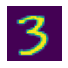

In [19]:
show_image(three_tensors[1])

## 01:22:44 - Axis of tensors

* A rank-3 tensor means it has 3 axis or dimensions.
  * Numpy calls rank value axis.
  * PyTorch calls it dimension.
* The shape attribute of a tensor returns a list with each element representing the size of an axis:

In [20]:
stacked_threes.shape

torch.Size([6131, 28, 28])

* Can get the rank of the tensor by taking the shape or calling `ndim`:

In [21]:
len(stacked_threes.shape), stacked_threes.ndim

(3, 3)

* The term "dimension" is used in 2 ways.
  * Sometimes used for size of an axis (space is 3 dimensional - each datapoint has an (x, y, z) value)
  * Sometimes used for the rank, or number of axes (a matrix has 2 dimensions)
* When confusing, use rank, axis and length which are unambiguous.

## 01:23:57 - Computing the mean

* Can calculate the mean of all image tensors, by taking mean along dimension zero, which gives us the "ideal" 3.

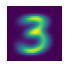

In [22]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

* Note: that if we didn't provide an axis, it would be the average across all axis:

In [23]:
stacked_threes.mean()

tensor(0.1415)

    * Same for 7s:

<AxesSubplot:>

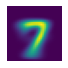

In [24]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

## 01:24:52 - Computing distance from mean

* First, i'll take one example of 3 at random:

In [25]:
a_3 = stacked_threes[10]

* Can't simply subtract each pixel from the corresponding pixel in the mean image, because some values would be negative and would average to nothing.
* Two approaches we could take to make positive values:
  * Take the mean of absolute value of differences ([[Absolute Value]] is a function that replaces negative values with positive values).
    * Called [[Mean Absolute Difference (L1 Norm)]]
  * Take the mean of the square of differences (which also makes everything positive) then take square root (to undo the squaring).
    * Called [[Root mean squared error (RMSE) (L2 norm]] 
      * Penalises bigger mistakes than L1 Norm.

* Mean absolute difference:

In [26]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1100), tensor(0.2018))

* Root mean squared error (RMSE)

In [27]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1556), tensor(0.2989))

* Since it's clearly closer to the 3 than the 7, we can guess it's 3.

* PyTorch provides these as loss functions in `torch.nn.functional` which is usually imported as `F`:

In [28]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1556), tensor(0.2989))

* MSE stands for mean squared error and L1 refers to math jargon for mean absolute value (in math called *L1 Norm*)

## 01:28:38 - Working with arrays and tensors

* Important to be comfortable working with arrays and tensors. Summary of key things:
   * Create array or tensor with lists of lists:

In [29]:
data = [[1, 2, 3], [4, 5, 6]]
arr = array(data)
tns = tensor(data)

In [30]:
arr  # numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

* Can index into a single row:

In [32]:
tns[1,:]

tensor([4, 5, 6])

* Or single column...in this example, we're fetching all columns:

In [33]:
tns[:,1]

tensor([2, 5])

* Can combine with Python slice syntax (`[start:end]`, `end` being excluded)

In [34]:
tns[1, 1:3]

tensor([5, 6])

* Can add to tensor

In [35]:
tns + 1

tensor([[2, 3, 4],
        [5, 6, 7]])

They have a type:

In [36]:
tns.type()

'torch.LongTensor'

Automaticaly converted from int to float if needed:

In [37]:
tns * 1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

## 01:30:53 - Computing metrics using broadcasting

* We want to create a validation set to check how good the model is.

In [38]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_3_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1010, 28, 28]))

* Want to write a function `is_3` that return True if it's a 3.
* We can first create a function that returns the mean of difference between somethings

In [39]:
def mnist_distance(a, b):
    return (a - b).abs().mean((-1, -2))

mnist_distance(a_3, mean3)

tensor(0.1100)

* To do for the entire validation set, we can call the same function on the entire validation set:

In [40]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1270, 0.1632, 0.1676,  ..., 0.1228, 0.1210, 0.1287]),
 torch.Size([1010]))

* Being able to run the same function on a single image or a rank-3 tensor of images is thanks to [[Broadcasting]].
  * Broadcasting expands the tensor with the smaller rank to have same size as one with larger rank.
  * In PyTorch, the broadcasting operation is done on the GPU.
  
* Need to first understand [[Element-wise operations]]
  * Operations that are performed on the corresponding elements of 2 vectors:

In [41]:
tensor([1,2,3]) + tensor([1,0,3])

tensor([2, 2, 6])

In [42]:
tensor([[1,2,3],[1,2,3]]) + tensor([1,0,3], [1,1,1])

tensor([[2, 2, 6],
        [2, 3, 4]])

* When you have different shapes, PyTorch "copies" the matrix the number of times required to have a shape that matches the larger rank.
    * It doesn't actually allocate any additional memory for copies of the matrix, just acts like it does.
    * Does all the operations in C or Cuda

In [43]:
(valid_3_tens - mean3).shape

torch.Size([1010, 28, 28])

* We can then call abs value, which calls it on each value:

In [44]:
(valid_3_tens - mean3).abs().shape

torch.Size([1010, 28, 28])

* Can then create an `is_3` function, which compares distance between perfect 3 and 7:

In [45]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

* When you convert boolean response to float, get 1.0 for true and 0.0 for false:

In [46]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

* Can test on full validation set of threes

In [47]:
is_3(valid_3_tens)

tensor([ True, False, False,  ...,  True,  True, False])

* Not that you're avoiding loops. Which makes it thousands or more times faster.

In [48]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

In [49]:
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2

(tensor(0.9168), tensor(1.), tensor(0.9584))

* Model is over 95% accurate to recognise 3s from 7s.

## 01:39:50 - Stochastic Gradient Descent (SGD)

* So far solution doesn't fit Arthur Samuel's description of Machine Learning.
    * It doesn't include a way to test and update the weight assignment.

* Instead of finding an ideal image, we could instead develop a set of weights for each pixel and train it to be better at recognising images.
* Want a function that takes the pixels of an image and the weights and returns a probability of it being a certain number. For simplicity we'll turn the weights and image into a long vector:

   * 28x28 -> 1x784

In [50]:
def pr_eight(x, w):
    return (x * w).sum()

* The approach to try is as follows:

1. Set the weights of the vector w to random values.
2. For each image, use weights to predict whether it appears to be a 3 or a 7.
3. Based on weights, calculate loss to see how good model is.
4. Calculate the gradient: for each weight, if I made smaller or larger, how would changing the weight change the loss?
5. Step (change) the weights based on the calculation.
6. Repeat from 2.
7. Stop training if results are good enough, or you don't want to wait any longer.

This approach is called Gradient Descent.

Each 7 steps has lots of choices that can be made. But the general approach follows basic principles:

* Initialise: set params to random values.
* Loss: Arthur Samuel's "testing the effectiveness of any current weight assignment in terms of actual performance"
  * Need a function that return a number that is small if performance of model is good.
* Step: could figure out if loss should be increased or decreased by just trying different values and seeing what happens. However, it's slow. Calculus allows us to figure out what direction to change the weights in.
* Stop: decide when to stop. Usually just a certain number of epochs.

## 01:46:05 - A simple first approach

* Start with a simple quadratic function - pretending it's a loss function with `x` as weight param of function:

In [51]:
def f(x):
    return x**2

In [52]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729141890/work/aten/src/ATen/native/RangeFactories.cpp:23.)
  


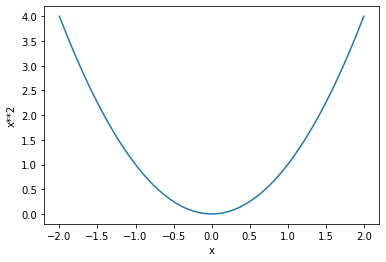

In [53]:
plot_function(f, 'x', 'x**2')

Try to find the bottom point - the x value at the bottom.

Start by picking a random value of parameter and calculating value of loss

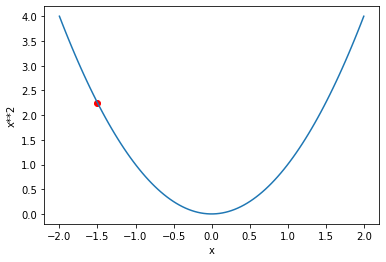

In [54]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

Then, see what happens if we increase or decrease our params a bit. This is slope at a particular point:

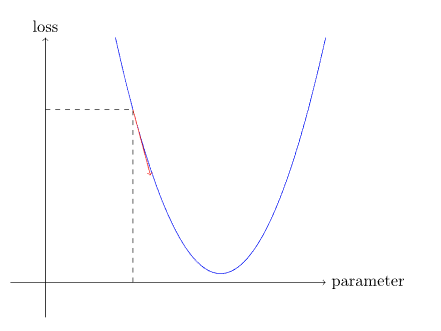

If you change weight in the direction of slope, and calculate loss and adjustment again, repeat this a few times.

Eventually, you will get to lowest point on curve:

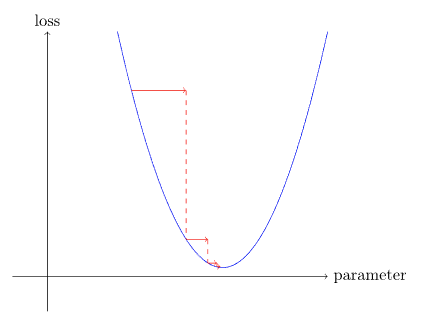

* Idea comes from Newton and is called: "Newton's Method"

## 01:48:05 - Calculating the gradients

* To calculate the derivative, we need calculus.
* However, you don't have to do calculus: the computer does it for you.
* In PyTorch, a tensor can be modified with `requires_grad_()`, so that every calculation has the gradient calculated.

In [55]:
xt = tensor(3.).requires_grad_()

* In PyTorch, when the method ends with `_` it means the function modifies the Tensor in place - it doesn't just return a new one.

In [56]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

* Can then tell PyTorch to calculate the gradients, using the `backward()` function.
  * Backward refers to "Back propagation" which means to take the gradient.

In [57]:
yt.backward()

* We can view the gradients by checking the `grad` attribute of the tensor:

In [58]:
xt.grad

tensor(6.)

* We know that worked from the power rule: `dx(x**2) = 2x` (`dx(3**3=2) = 6`)

* Now we can repeat with a vector argument:

In [59]:
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

* Add `sum()` to function to take a vector (rank-1 tensor) and return a scalar (rank-0 tensor):

In [60]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

* We expect the gradients to be 6, 8 and 20 respectively. Let's see:

In [61]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

## 01:52:41 - Learning rates

* The gradient only tells us the slope of the function. Doesn't say how far to adjust the params.
  * If the slope is large, then there are more adjustments to do, but if small then we may be close.
* Can use a simple function that subtracts the gradients multiplied by some smaller number (usually between 0.001 and 0.1) called: learning rate.

```
w ~= gradient(w) * lr
```

* If the learning rate is too small, it will take a long time to "converge" (find the min)
* If too large, it may never find it.
* Picking a good learning rate is an essential part of gradient descent.

## 01:54:41 - Gradient Descent end-to-end example

* Imagine measuring speed of rollercoaster as it goes over and down a hump.

In [62]:
time = torch.arange(0, 20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

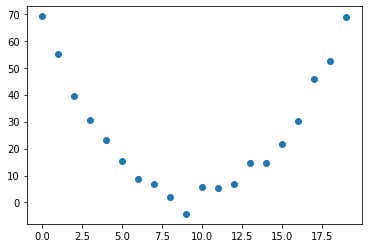

In [63]:
speed = torch.randn(20) * 3 + 0.75 * (time - 9.5)** 2 + 1
plt.scatter(time, speed)

* A bit of random noise was added, which estimates at anytime what the speed of the roller coaster is. We can start by guessing it's a quadradtic function:

In [64]:
def f(t, params):
    a, b, c = params
    return a * (t ** 2) + (b * t) + c

In [65]:
def mse(preds, targets):
    return ((preds - targets) ** 2).mean()

Step 1. Init to random values and tell PyTorch to check gradients with `requires_grad_()`

In [66]:
params = torch.randn(3).requires_grad_()

In [67]:
orig_params = params.clone()

Step 2. Calculate the predictions:

In [68]:
preds = f(time, params)

* Create a function that shows how close predictions are to target. The predictions are shown in red.

In [69]:
def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

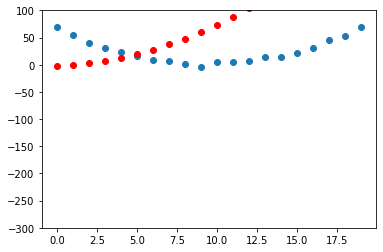

In [70]:
show_preds(preds)

* Obviously we arne't very close since we haven't done any training.

Step 3. Calculate the loss:

In [71]:
loss = mse(preds, speed)
loss

tensor(9926.4844, grad_fn=<MeanBackward0>)

The goal is to improve it. To do it, we'll need to know the gradients.

Step 4. Calculate the gradients. An approximation of how params need to change.

In [72]:
loss.backward()
params.grad

tensor([32286.3848,  2084.4243,   125.6352])

In [73]:
params.grad * 1e-5

tensor([0.3229, 0.0208, 0.0013])

Step 5. Update the params based on gradients ("step" the weights)
  * We use `.data` attribute which ensures the gradient isn't calculated on that step.

In [74]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

Has loss improved?

In [75]:
preds = f(time, params)
loss = mse(preds, speed)
loss

tensor(2415.8665, grad_fn=<MeanBackward0>)

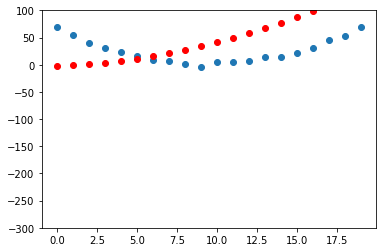

In [76]:
show_preds(preds)

Looks like it has! Quite a bit.

Let's do it a bunch more times.

In [77]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [78]:
for i in range(10): apply_step(params)

2415.866455078125
994.6248168945312
725.6793212890625
674.7831420898438
665.148681640625
663.3221435546875
662.97314453125
662.9036865234375
662.8871459960938
662.8807373046875


* We can also visualise the loss getting better:

In [79]:
params = orig_params.detach().requires_grad_()

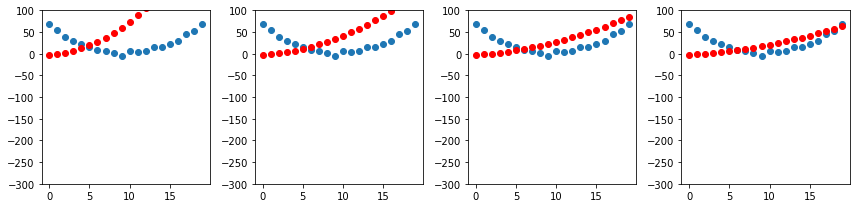

In [80]:
_,axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

* Step 7 is to just stop. We usually stop when we stop seeing performance improvements on validation set.